In [1]:
import pandas as pd
from sklearn.cluster import KMeans
#from matplotlib.pyplot import matplotlib as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import decomposition

In [2]:
df = pd.read_csv('/content/drive/MyDrive/RFM Analysis/OnlineRetail.csv')

In [3]:
df.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [38]:
df.head(7)

,Recency,Frequency,Monetary,pc1,pc2,Cluster
CustomerID,,,,,,
12346.0,4525,2,0.00,-1.335302,1.944220,1
12347.0,4201,182,4310.00,0.797290,-0.628277,0
12348.0,4274,31,1797.24,-0.116834,-0.207816,0
12349.0,4218,73,1757.55,0.222402,-0.680026,0
12350.0,4509,17,334.40,-1.203204,1.827664,1
12352.0,4235,95,1545.41,0.201249,-0.519370,0
12353.0,4403,4,89.00,-0.837955,0.852336,1


In [39]:
df.tail(12)

,Recency,Frequency,Monetary,pc1,pc2,Cluster
CustomerID,,,,,,
18270.0,4237,13,2.389500e+02,-0.141111,-0.627011,0
18272.0,4202,170,3.064780e+03,0.663226,-0.686360,0
18273.0,4201,3,2.040000e+02,-0.029264,-0.960465,0
18274.0,4217,22,1.776357e-15,-0.054371,-0.810818,0
18276.0,4220,16,3.233600e+02,-0.058505,-0.773666,0
18277.0,4257,9,9.763000e+01,-0.242872,-0.456792,0
18278.0,4273,9,1.739000e+02,-0.300579,-0.309322,0
18280.0,4477,10,1.806000e+02,-1.107847,1.527094,1
18281.0,4380,7,8.082000e+01,-0.738635,0.647424,1


In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.shape

(541909, 8)

In [6]:
# Delete rows with missing values from the CustomerID column
df =df.dropna(subset=['CustomerID'])

In [7]:
df.shape

(406829, 8)

In [8]:
df['Sales_value'] = df['Quantity'] * df['UnitPrice']

In [9]:
# Convert the InvoiceDate column to datetime type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [22]:
reference_date = datetime.now()  
df= df.groupby('CustomerID') .agg({
'InvoiceDate' :lambda v:(reference_date- v.max()).days,
'InvoiceNo':'count',
'Sales_value':'sum'
})

df = df.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'Sales_value': 'Monetary'})

In [25]:
X= df[['Recency', 'Frequency', 'Monetary']]

In [26]:
# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
# Perform clustering with k-means

k = 3  # Specify the number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [28]:
# perform Principal Component Analysis
pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(X)
df['pc1'] = pca_res[:,0]
df['pc2'] = pca_res[:,1]

<ipython-input-29-89c51b05fa5c>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['pc1'] , df['pc2'] , cmap='viridis')


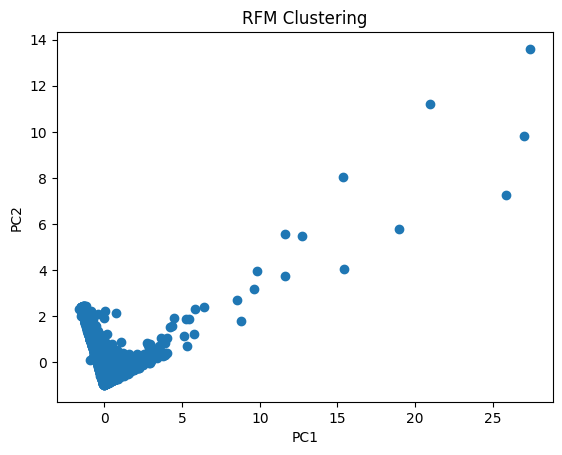

In [29]:
# Assign the cluster labels to the original RFM data
df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(df['pc1'] , df['pc2'] , cmap='viridis')
plt.title('RFM Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [32]:
df.head()

,Recency,Frequency,Monetary,pc1,pc2,Cluster
CustomerID,,,,,,
12346.0,4525,2,0.00,-1.335302,1.944220,1
12347.0,4201,182,4310.00,0.797290,-0.628277,0
12348.0,4274,31,1797.24,-0.116834,-0.207816,0
12349.0,4218,73,1757.55,0.222402,-0.680026,0
12350.0,4509,17,334.40,-1.203204,1.827664,1


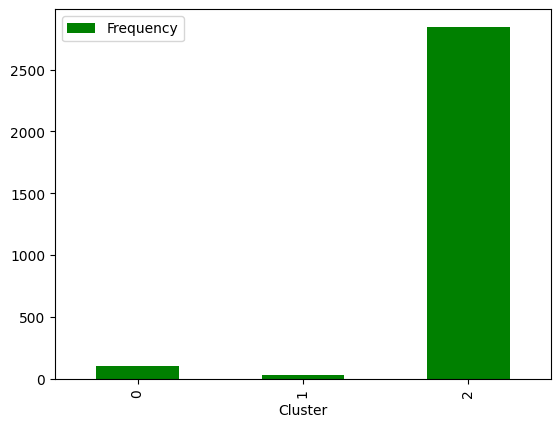

In [35]:

#visualizing our clusters
df.groupby('Cluster')[[ 'Frequency']].mean().plot.bar(color=['green'])
plt.show()

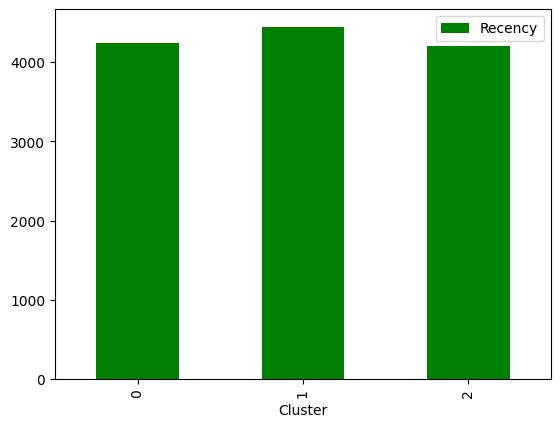

In [36]:
#visualizing our clusters
df.groupby('Cluster')[[ 'Recency']].mean().plot.bar(color=['green'])
plt.show()

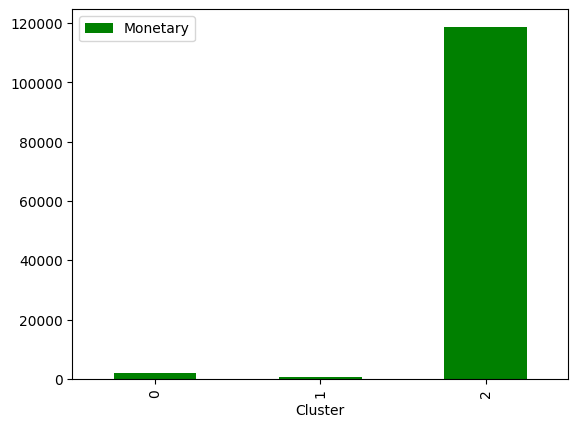

In [37]:
#visualizing our clusters
df.groupby('Cluster')[[ 'Monetary']].mean().plot.bar(color=['green'])
plt.show()